### GRIP 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Checking Correlation

In [7]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Data Visualization

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import seaborn as  sns

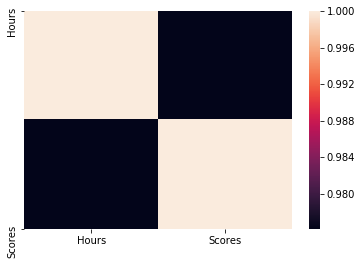

In [9]:
sns.heatmap(df.corr())

### Check the Assumptions, the independent and dependent varaibale are correlated.

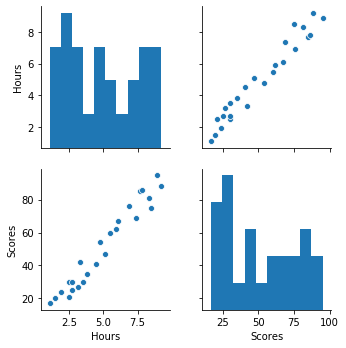

In [10]:
sns.pairplot(df)

### Check the Variable are normally distributed.

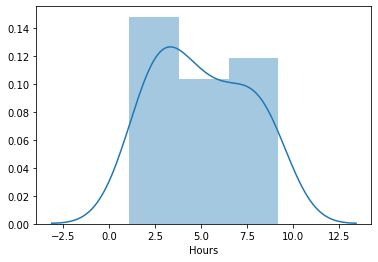

In [11]:
sns.distplot(df['Hours'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000212EA420EC8>]],
      dtype=object)

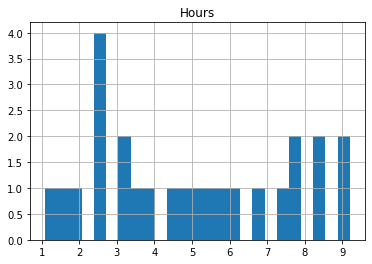

In [12]:
df.hist('Hours',bins=25)

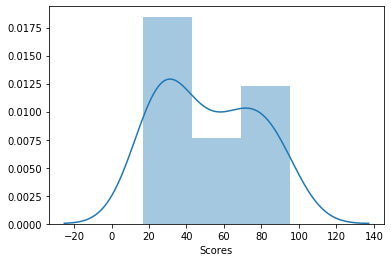

In [13]:
sns.distplot(df['Scores'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000212EA4708C8>]],
      dtype=object)

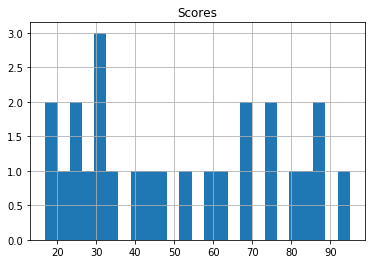

In [14]:
df.hist('Scores',bins=25)

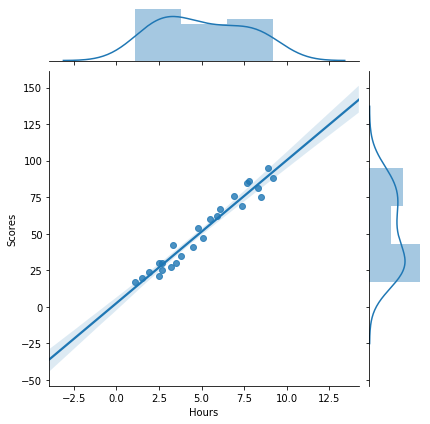

In [15]:
sns.jointplot(x='Hours',y='Scores',data=df,kind='reg')

### Check the Outliers

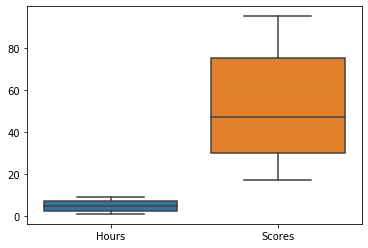

In [16]:
sns.boxplot(data=df)

### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#### Doing the train test part for train the model.

df_train,df_test=train_test_split(df,test_size=0.3,random_state=2)

In [19]:
x_train=df_train.drop(['Scores'],axis=1)
y_train=df_train['Scores']
x_test=df_test.drop(['Scores'],axis=1)
y_test=df_test['Scores']

In [20]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((17, 1), (17,), (8, 1), (8,))

### Model Creation

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr=LinearRegression()

In [23]:
### Fit the model

lr.fit(x_train,y_train)

LinearRegression()

In [25]:
### Model Prediction

In [26]:
y_pred=lr.predict(x_test)

In [27]:
y_pred

array([11.02900268, 25.62801721, 19.3712967 , 95.49472962, 71.51063432,
       27.71359072, 88.19522235, 25.62801721])

In [28]:
df1=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
14,17,11.029003
0,21,25.628017
17,24,19.371297
6,88,95.494730
23,76,71.510634
9,25,27.713591
3,75,88.195222
16,30,25.628017


In [29]:
residuals=y_pred-y_test
residuals

14    -5.970997
0      4.628017
17    -4.628703
6      7.494730
23    -4.489366
9      2.713591
3     13.195222
16    -4.371983
Name: Scores, dtype: float64

In [30]:
df2=pd.DataFrame({'Actual': y_test, 'error': residuals})
df2

,Actual,error
14,17,-5.970997
0,21,4.628017
17,24,-4.628703
6,88,7.494730
23,76,-4.489366
9,25,2.713591
3,75,13.195222
16,30,-4.371983


In [32]:
rmse=np.sqrt(np.dot(residuals,residuals)/len(y_test))
rmse

6.665333111498137

In [33]:
#### Checking Mean Absolute Error.

from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 5.936576124243745


### Model Evaluate

In [34]:
#### Model Prediction on 9.25 Hours

In [35]:
hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = lr.predict(hours)
print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_pred[0]}")

No of Hours = [[9.25]]
Predicted Score = 96.01612299632009


### Visualization After Model Prediction

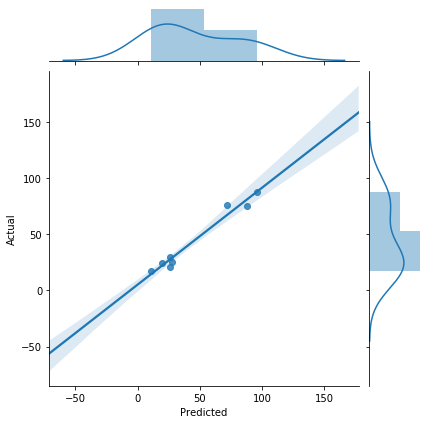

In [37]:
sns.jointplot(x='Predicted',y='Actual',data=df1,kind='reg')

### Homoscedasticity Assumptions

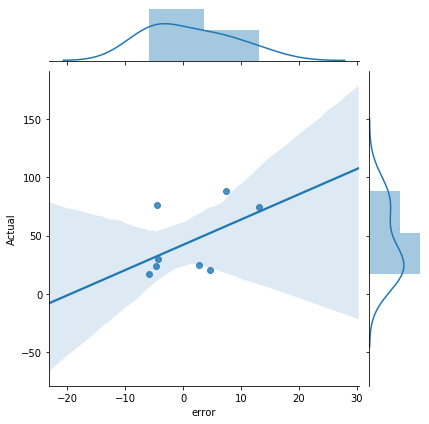

In [38]:
sns.jointplot(x='error',y='Actual',data=df2,kind='reg')

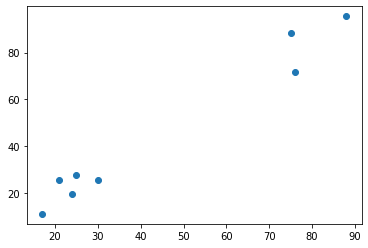

In [39]:
plt.scatter(y_test,y_pred)